# Water Quality Monitoring & Prediction

### Project Overview

Access to safe drinking water is essential to health, a basic human right, and a key component of effective health protection policies. For Aqua Clara Solutions, this is not only a health and development issue at national, regional, and local levels but also a mission to improve lives through innovative water filtration systems. By investing in water supply and sanitation, we can achieve significant economic benefits, as the reduction in adverse health effects and healthcare costs will outweigh the costs of implementing these interventions. This approach enhances the well-being of communities and drives the demand for our high-quality water filters, ultimately boosting our sales and expanding our reach to more regions in need.
This project seeks to identify and mitigate potential contaminants, optimize water treatment processes, and support informed decision-making to protect public health and enhance environmental sustainability. By leveraging advanced data analysis and predictive modeling techniques, the project aims to maintain high standards of water quality, thereby improving the effectiveness and sales of Aqua Clara Solutions' water filtration products.

## importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## The dataset

In [95]:
# we import our dataset
pd.read_csv("Water_potability.csv")

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [96]:
# we rename the dataset for ease of analysis
df=pd.read_csv("Water_potability.csv")
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Hypothesis

Null Hypothesis (H0)
There is no significant difference between the measured water quality parameters and the established safety standards, implying that the water is safe for consumption without further treatment or intervention.

Alternative Hypothesis (H1)
There is a significant difference between the measured water quality parameters and the established safety standards, indicating that the water may be unsafe for consumption and requires additional treatment or intervention.

## Exploratory Data Analysis (EDA)

In [100]:
# view the first five observations
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [101]:
# last 4 observations
df.tail(4)

ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
3272  7.808856  193.553212  17329.802160     8.061362      NaN    392.449580   
3273  9.419510  175.762646  33155.578218     7.350233      NaN    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357      NaN    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306      NaN    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
3272       19.903225              NaN   2.798243           1  
3273       11.039070        69.845400   3.298875           1  
3274       11.168946        77.488213   4.708658           1  
3275       16.140368        78.698446   2.309149           1

In [102]:
# identify the number of rows and columns
df.shape # we have 3276 rows and 10 columns

(3276, 10)

In [103]:
# the size of the dataset
df.size

32760

In [104]:
# list all columns
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [105]:
# renaming the column ph to Ph for uniformity
df.rename(columns={"ph":"Ph"},inplace=True)
df


Ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [106]:
# have some general information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


From the above code, we have a total of 10 variables, 3276 rows .All the variables are of float datatype except 'Portability' which is an integer.'Ph','Sulfate'&'Trihalomethanes' have missing values.

In [108]:
# summary statistics
# to find the mean, mode, median, max, min values , std  for each variable
df.describe()

Ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [109]:
# check for missing values for each column
df.isna().sum()

Ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [110]:
# To check the percentage of water that is safe/usafe for consumption in our dataset
df.Potability.value_counts(normalize=True)*100

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

From our sample, the larger percentage 60.99% consists of unsafe water, 39.01% is safe for consumption

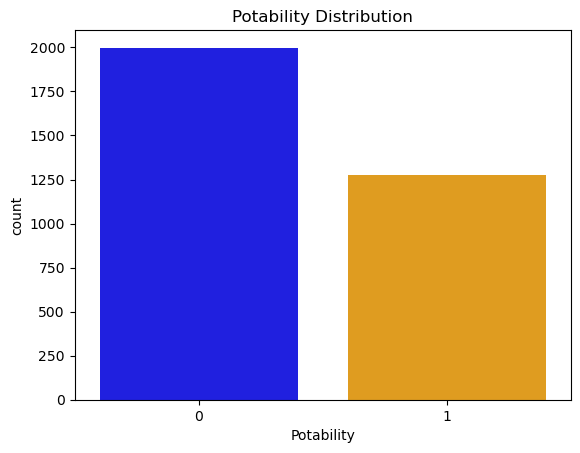

In [192]:
# Class distribution for portability
# 1 means potable while 0  means not potable
sns.countplot(x='Potability', data=df,palette=['blue', 'orange'])
plt.title('Potability Distribution')
plt.show()

Potable water is free from harmful contaminants and meets safety standards set by health authorities.

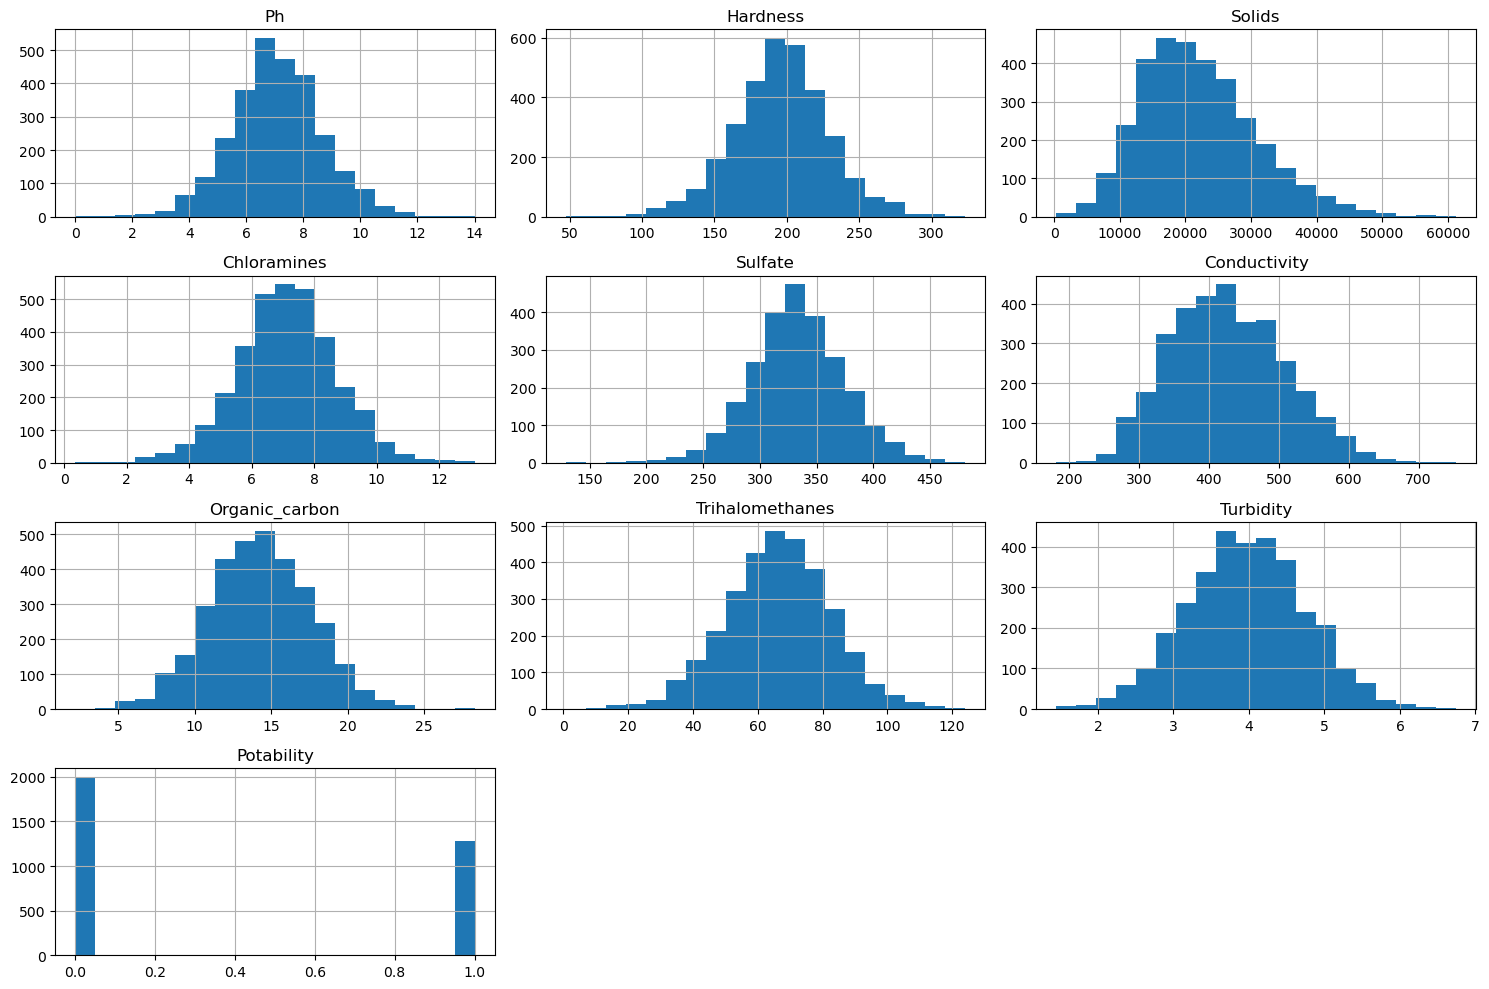

In [121]:
# Histograms for each variable
# to help us identify the distribution of each variable
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

The graphs above show the distribution of our variables, most of the variables are skewed to the right impling that their means are greater than the
respective medians.

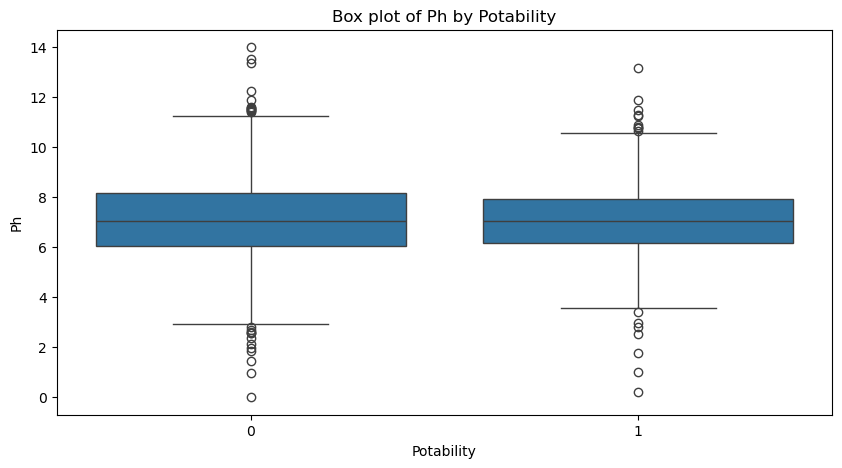

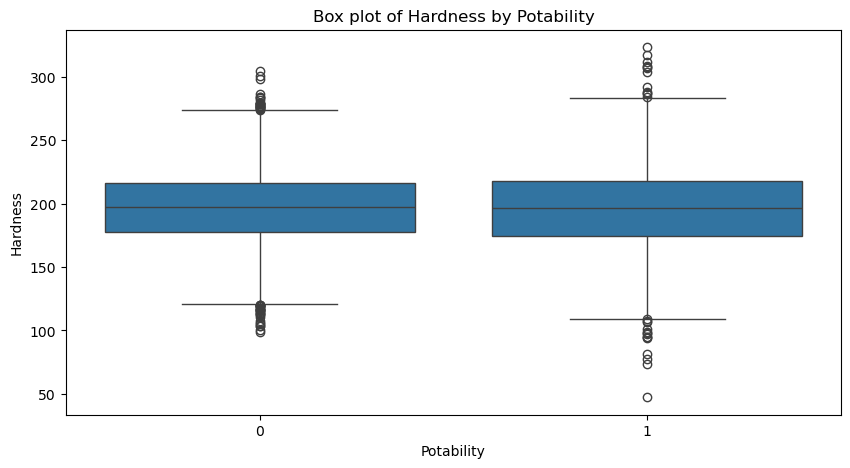

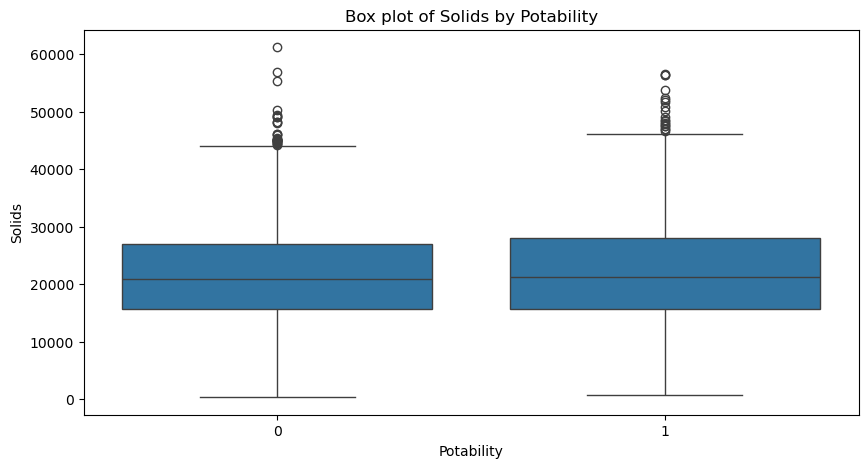

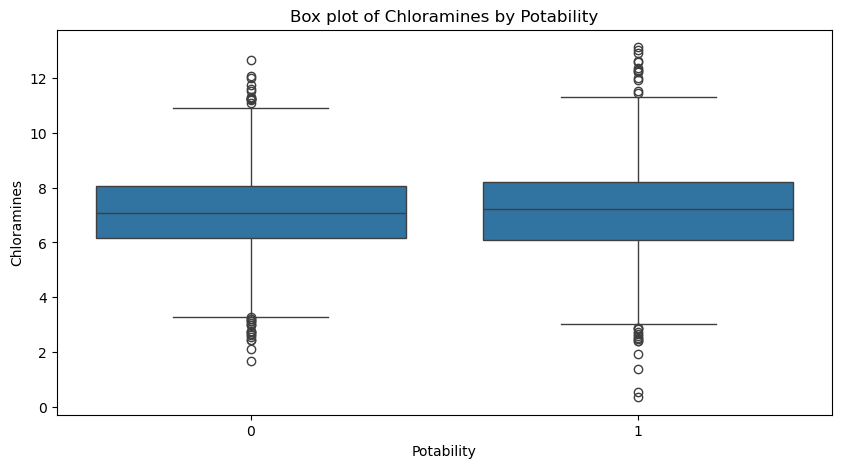

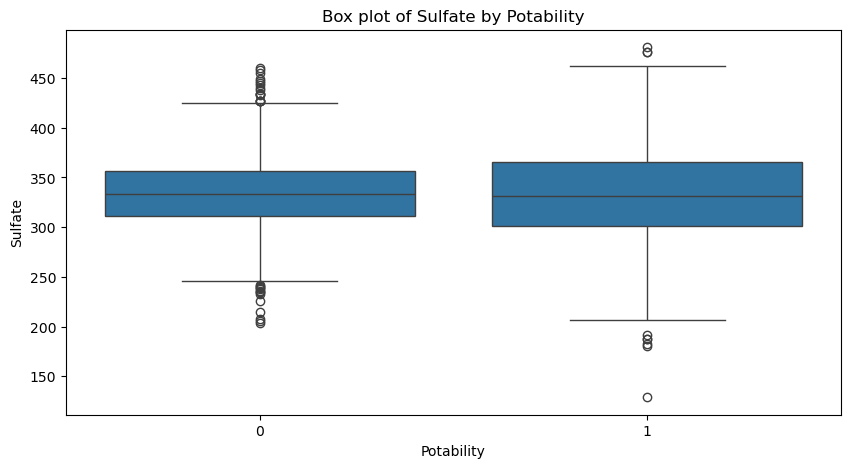

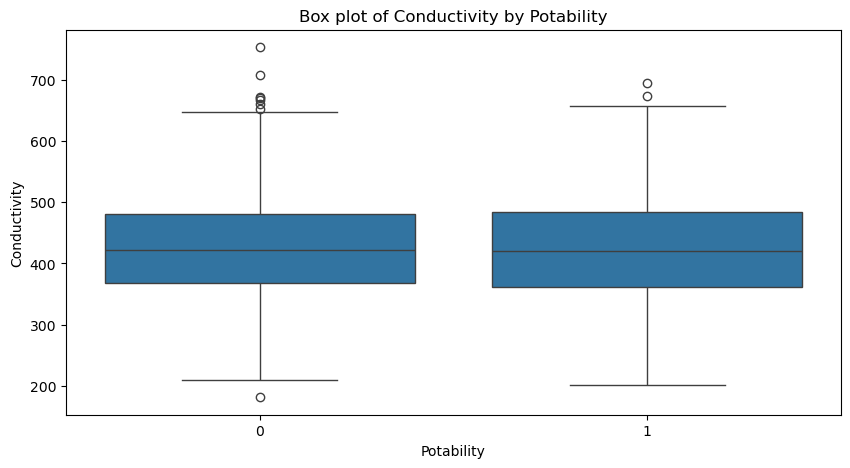

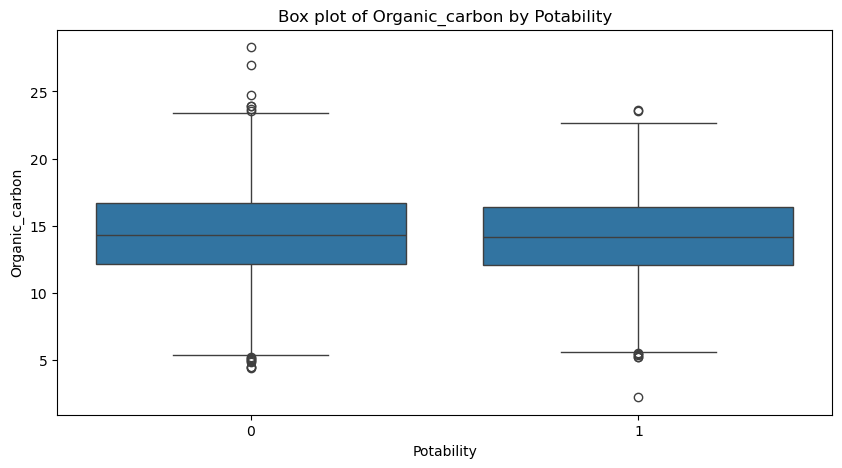

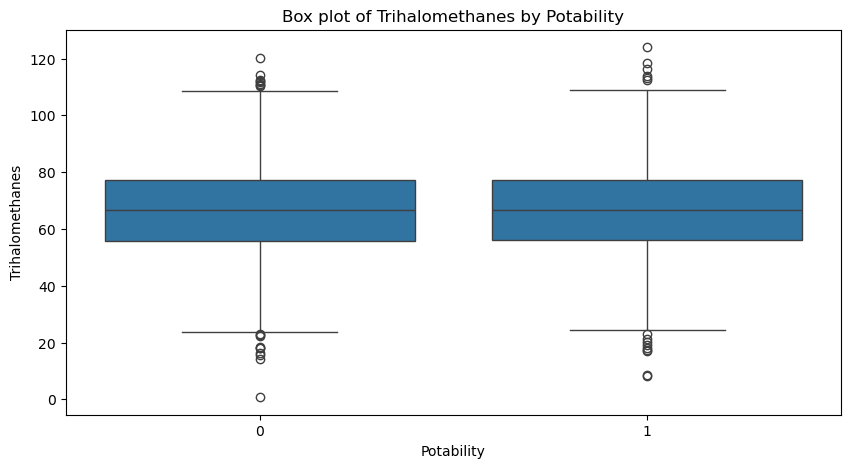

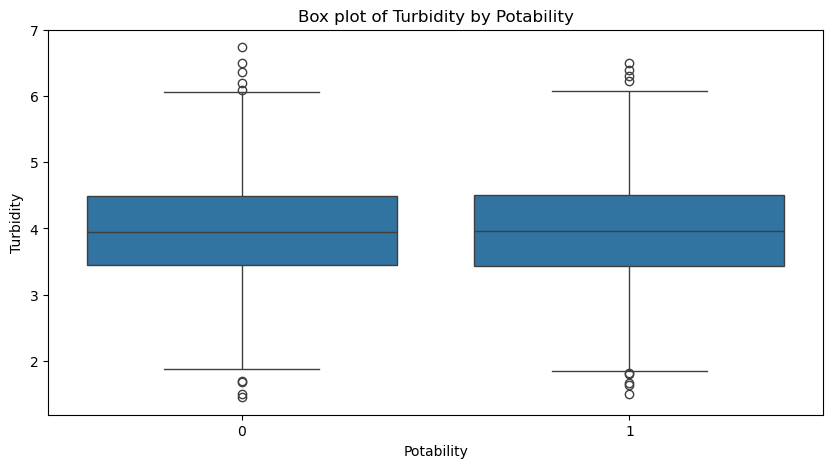

In [123]:
# show box plots to indentify outliers in each variable 
for column in df.columns[:-1]:  # Exclude Potability
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Potability', y=column, data=df)
    plt.title(f'Box plot of {column} by Potability')
    plt.show()


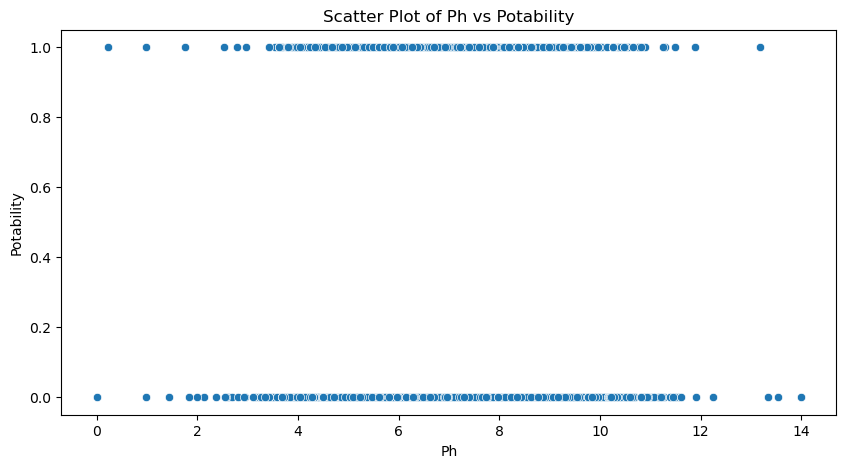

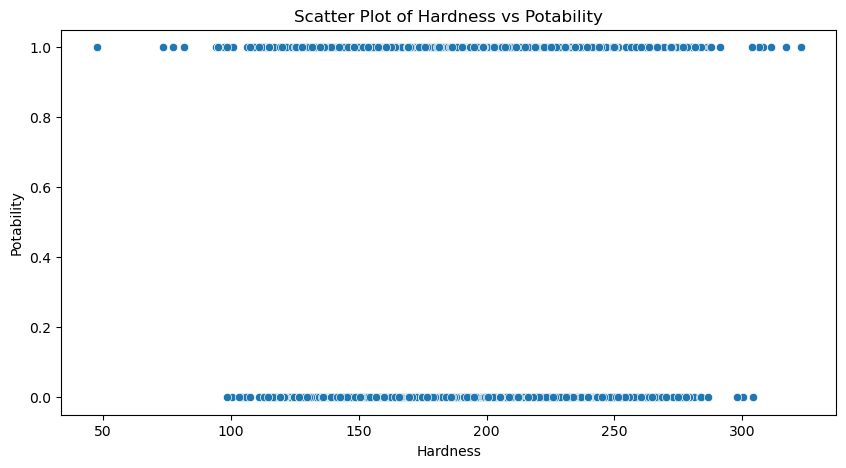

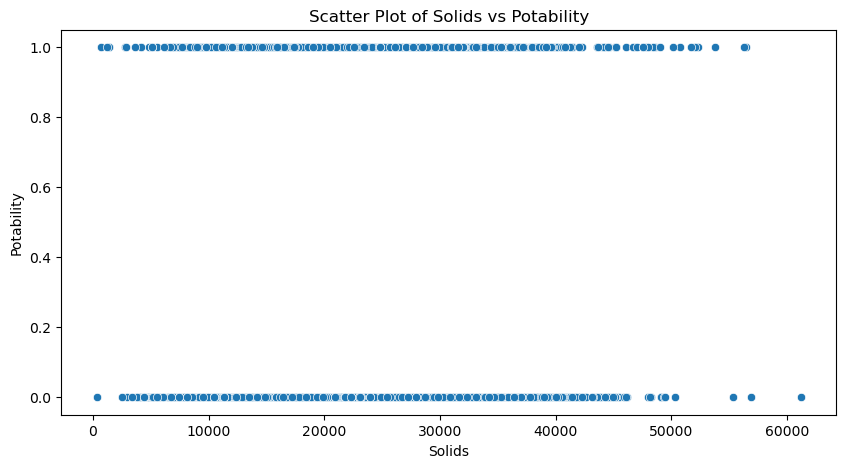

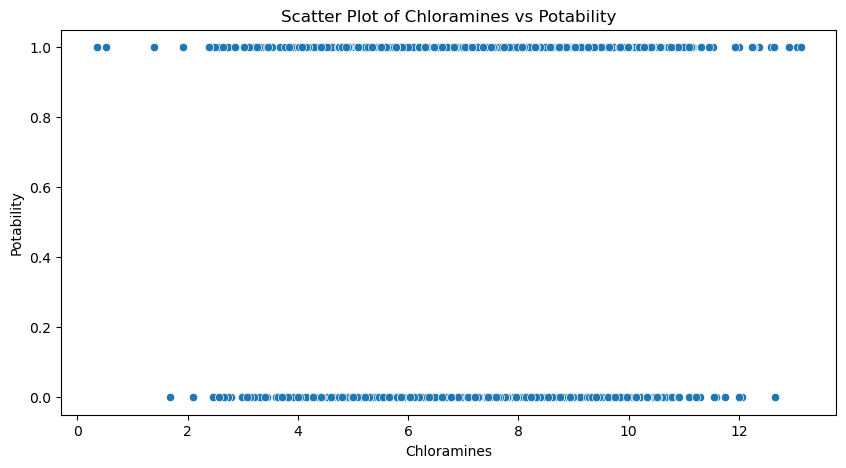

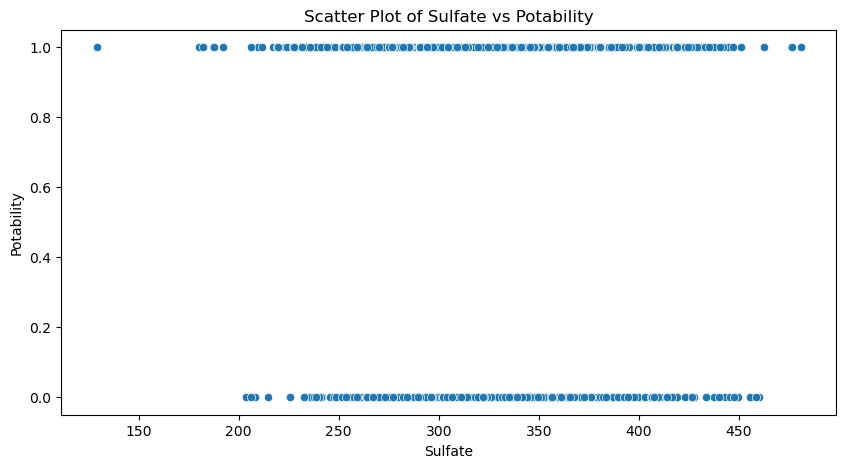

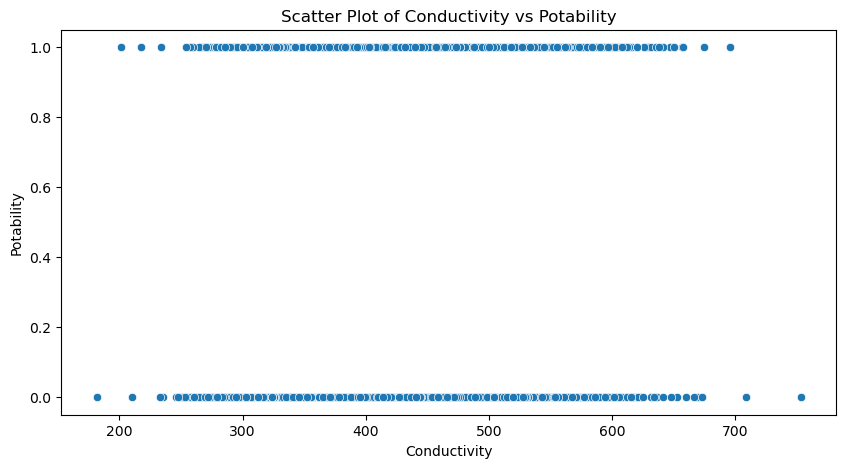

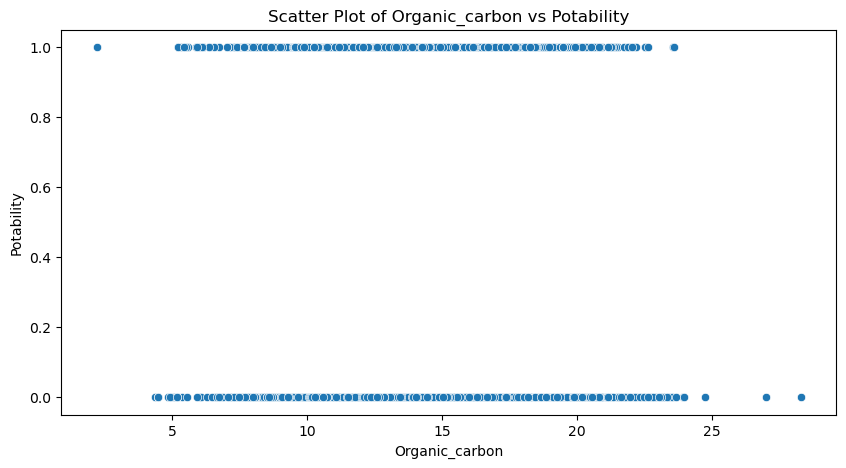

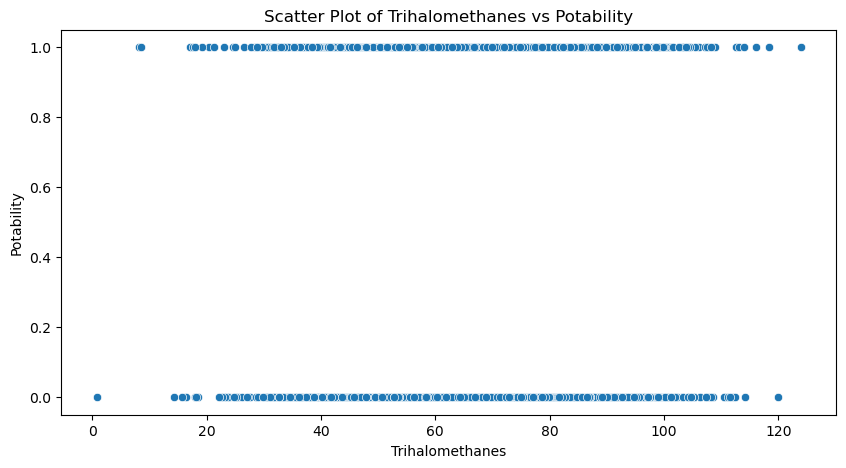

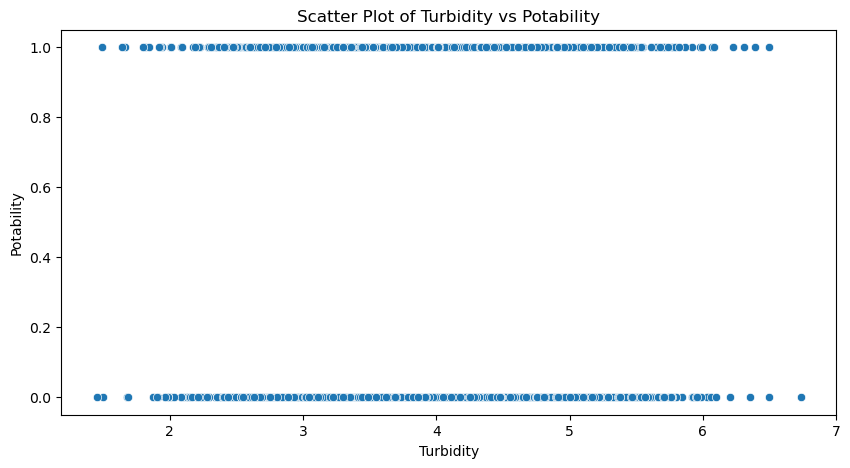

In [125]:
# what of scatter plots to see the realtionsship between each variable and Portability
# Plot scatter plots for each variable against Potability
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=column, y='Potability')
    plt.title(f'Scatter Plot of {column} vs Potability')
    plt.xlabel(column)
    plt.ylabel('Potability')
    plt.show()

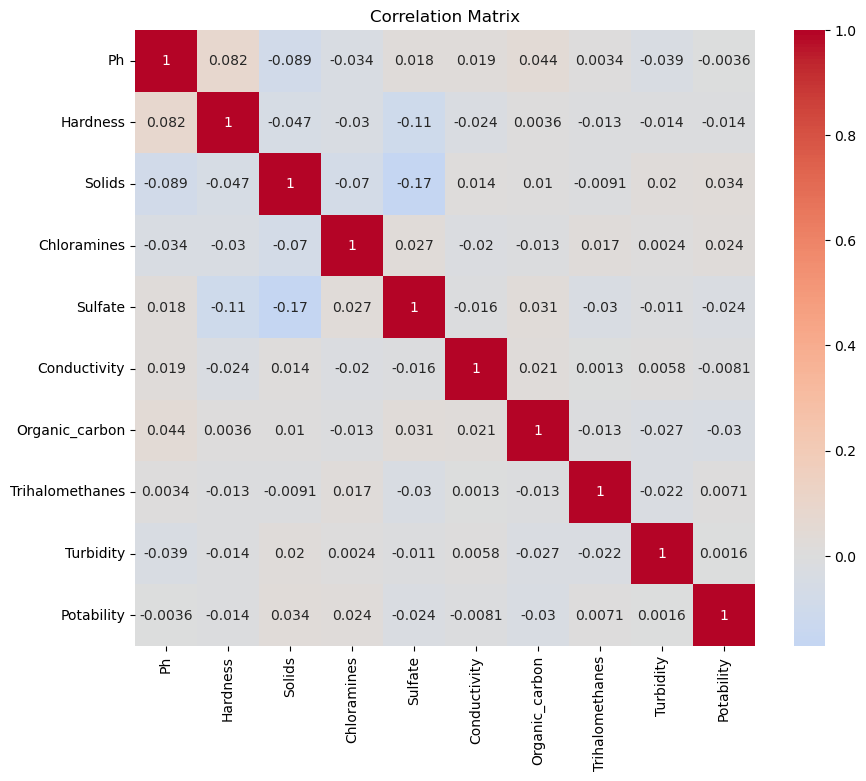

In [127]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix and heat map show the strength of the variables to the depedent variable where -1 is the weak negative correlation and 1 signifies a strong positive correlation

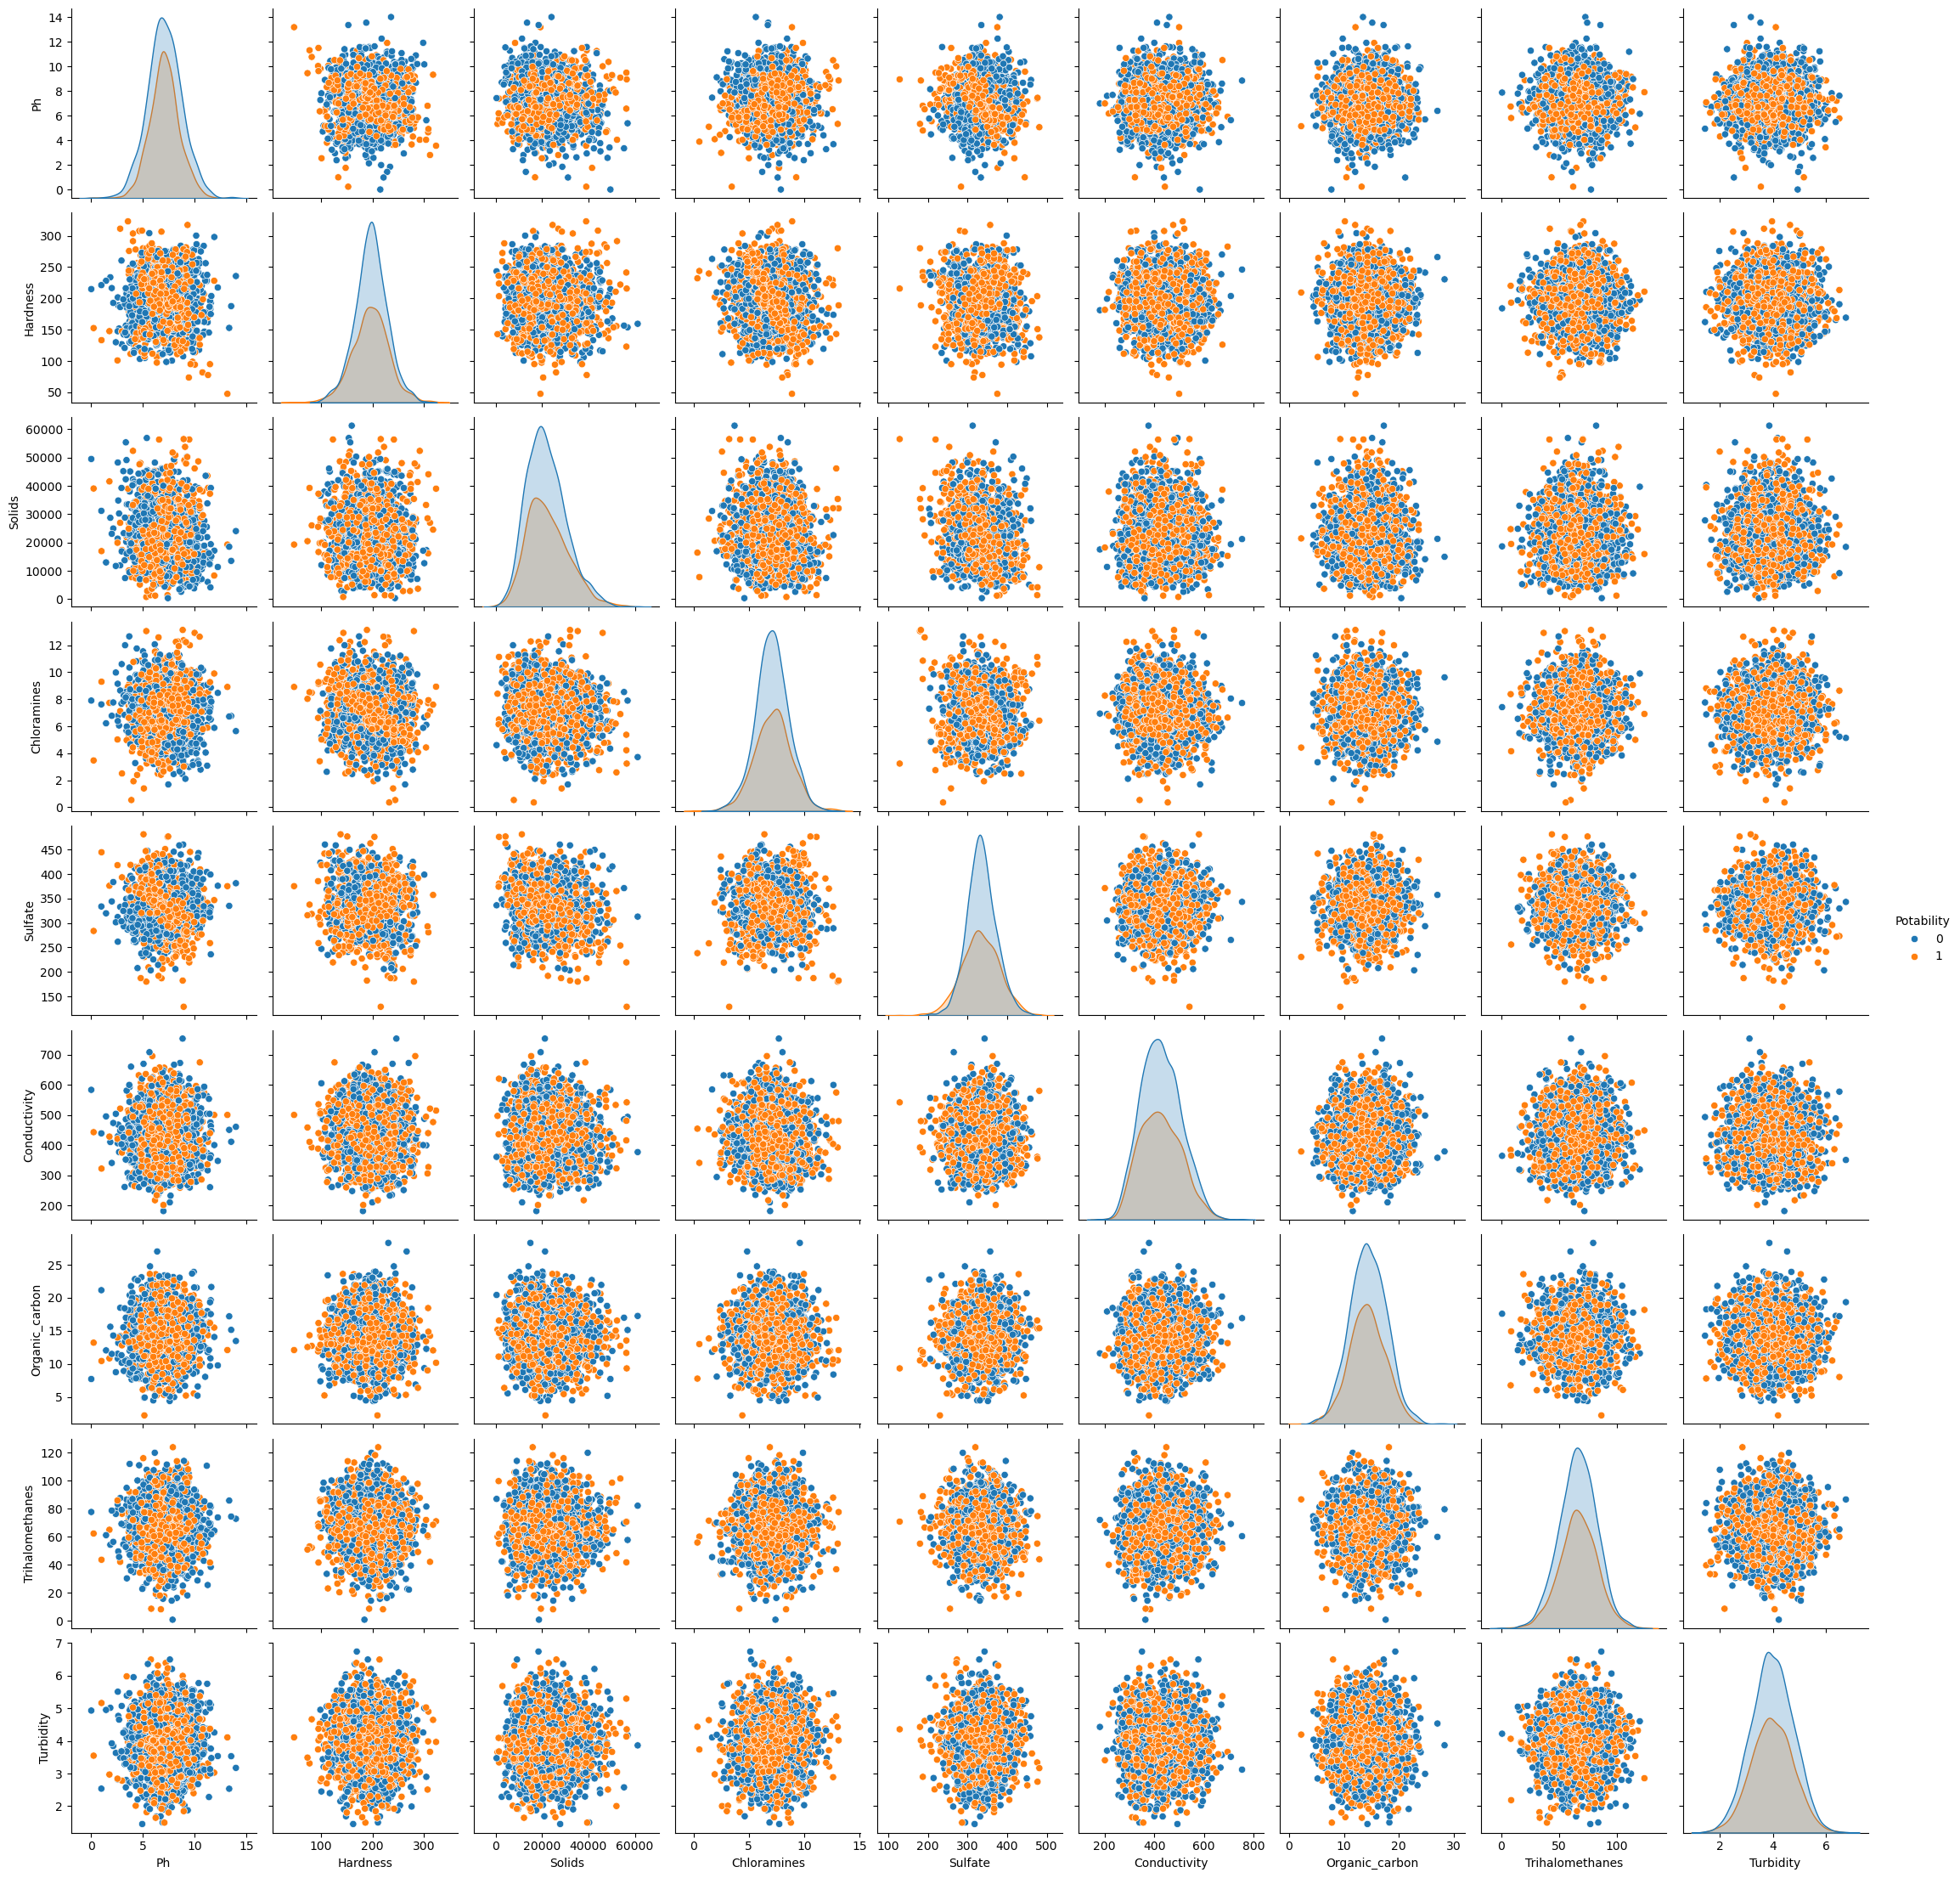

In [129]:
# see the relationship btwn variables and potability
# Pair plot/ scatter plot matrix
sns.pairplot(df, hue='Potability')
plt.show()

As we saw earlier we had some columns that had missing values, we could like to deal with them before we go to the analysis part.

In [131]:
#recall
df.isna().sum()

Ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [133]:
# impute using median for PH
df.fillna(df.Ph.median(), inplace=True)
df


Ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.036752   
2     8.099124  224.236259  19909.541732     9.275884    7.036752   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.036752   
3273  9.419510  175.762646  33155.578218     7.350233    7.036752   
3274  5.126763  230.603758  11983.869376     6.303357    7.036752   
3275  7.874671  195.102299  17404.177061     7.509306    7.036752   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225         7.036752   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [135]:
# impute using mode for sulfate
# we use mode since we have high variability or potential outliers, and we want to avoid the influence of extreme values.
print(df.Sulfate.max()) # checking the max val
print(df.Sulfate.min())# checking the min val
df.fillna(df.Sulfate.median(), inplace=True)# imputing the missing vals with mode

481.0306423059972
7.036752103833548


In [137]:
df.fillna(df.Trihalomethanes.median(),inplace=True)
df

Ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    7.036752   
2     8.099124  224.236259  19909.541732     9.275884    7.036752   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    7.036752   
3273  9.419510  175.762646  33155.578218     7.350233    7.036752   
3274  5.126763  230.603758  11983.869376     6.303357    7.036752   
3275  7.874671  195.102299  17404.177061     7.509306    7.036752   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225         7.036752   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [139]:
# lets check for duplicates
df.duplicated().sum() 

0

In [143]:
df.isna().sum()

Ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now that we are done with the EDA /data cleaning part, we can head to drawing insights from our data

## Data Analysis/ Vizualizations

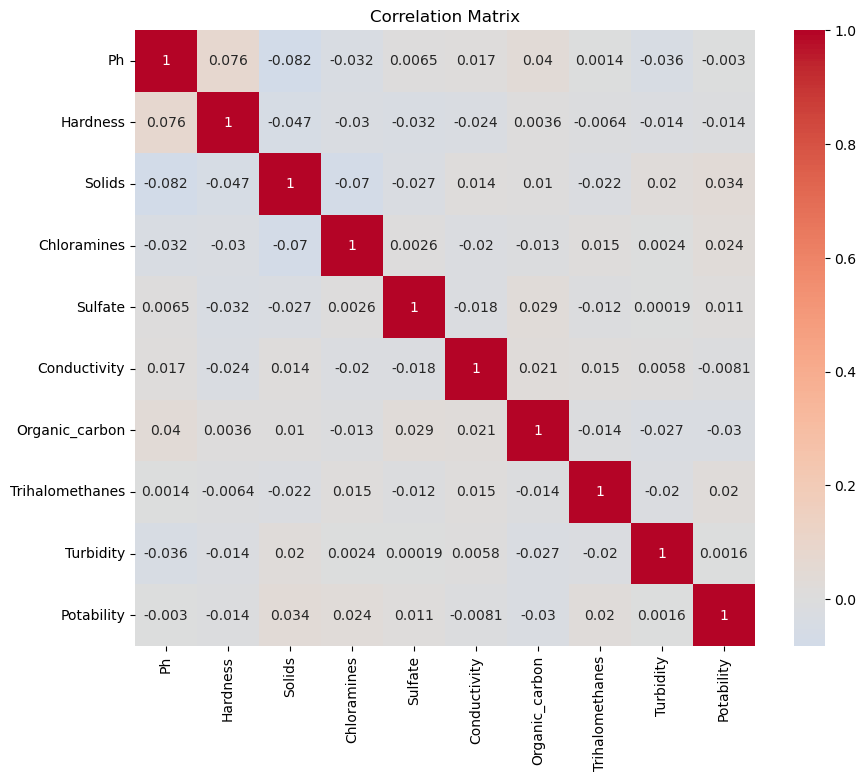

In [145]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

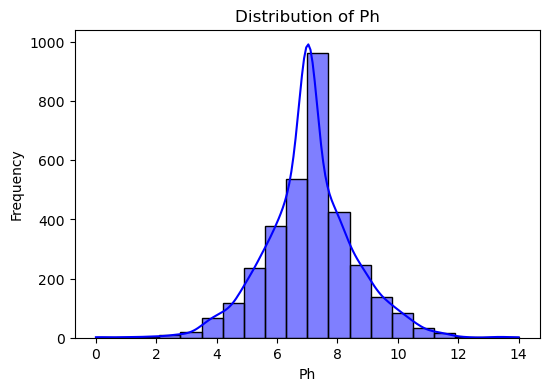

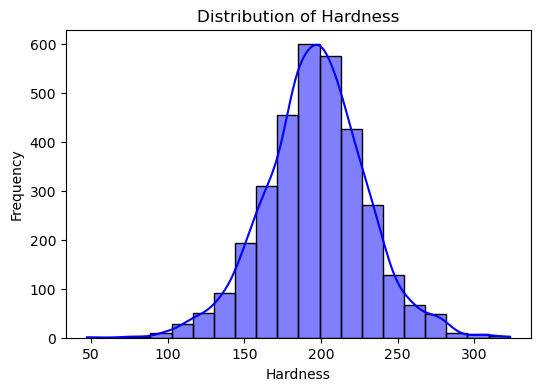

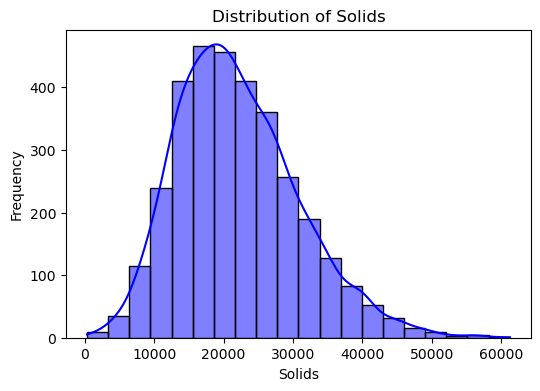

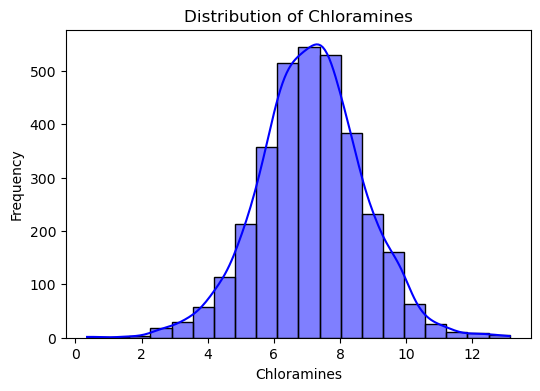

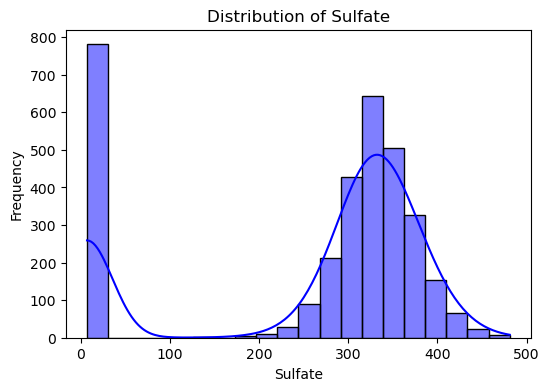

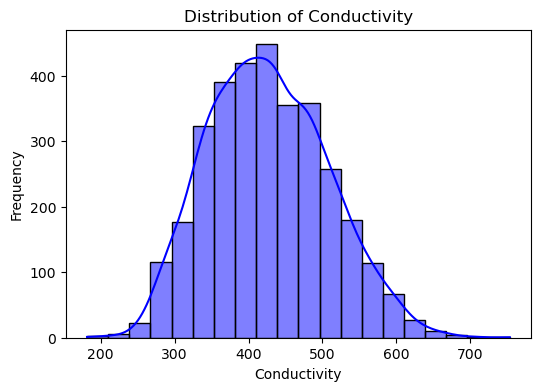

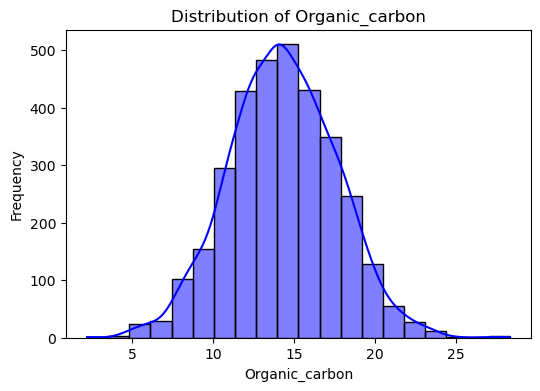

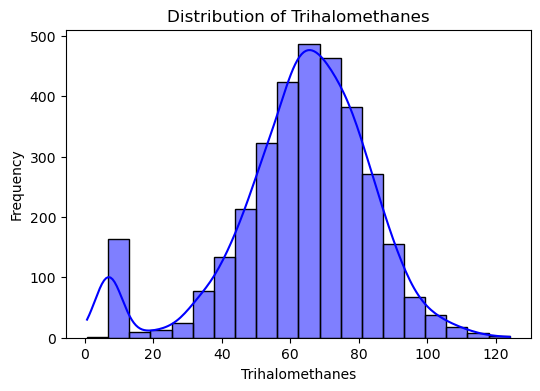

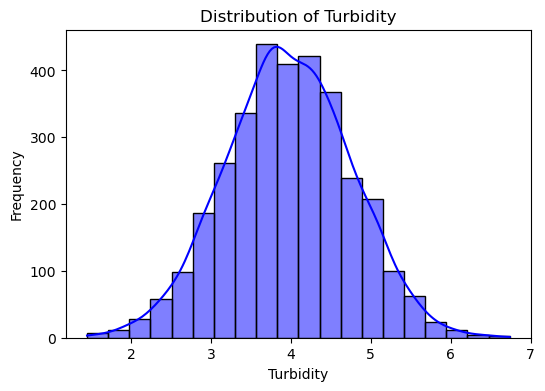

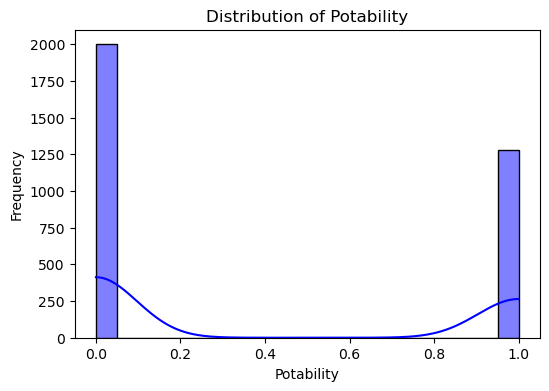

In [147]:
 #Distribution plots for each column
#column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
column=df.columns[:-1]
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

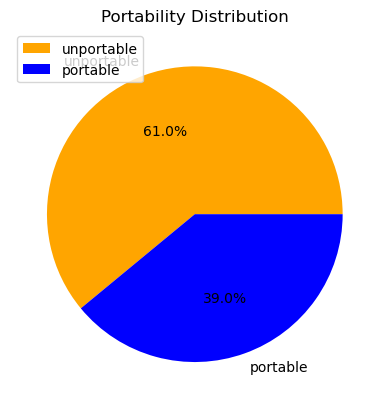

In [149]:
portability=df.Potability.value_counts()
portability
plt.pie(portability, labels = ["unportable", "portable"], autopct= "%.1f%%", colors=["orange", "blue"]) # The plt.pie() expects the numerical values
plt.legend()
plt.title("Portability Distribution")

plt.show()

A larger percentage indicates that the water is unportable hence NOT safe for consumption

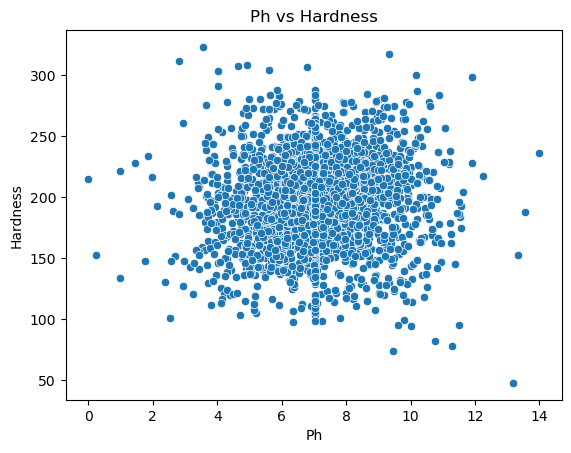

In [151]:
# just having a view of the relationship between ph and hardness
sns.scatterplot(data=df, x="Ph",y="Hardness")
plt.title("Ph vs Hardness")
plt.show()

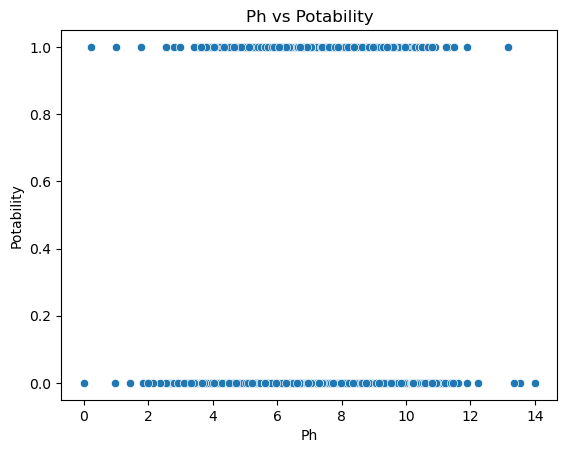

In [153]:
sns.scatterplot(data=df, x="Ph",y="Potability")
plt.title("Ph vs Potability")
plt.show()

## The Models

#### Logistic Regression

Data preparation for training

In [176]:
# Prepare the features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and test sets*
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [178]:
model_logistic = LogisticRegression()
# fitting the model to the training data
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [184]:
# Predict the test set results
y_pred = model_logistic.predict(X_test)

In [186]:
# Fitting the logistic regression model using statsmodels
import statsmodels.api as sm
# Add a constant to the model (required for statsmodels)
X_train_sm = sm.add_constant(X_train)
# Fitting the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
# Print the summary of the logistic regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.670530
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Potability   No. Observations:                 2293
Model:                          Logit   Df Residuals:                     2283
Method:                           MLE   Df Model:                            9
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                0.002308
Time:                        09:39:27   Log-Likelihood:                -1537.5
converged:                       True   LL-Null:                       -1541.1
Covariance Type:            nonrobust   LLR p-value:                    0.6253
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3209      0.570     -0.563      0.573      -1.438       0.796
Ph            

#### Random Forest Classifier

In [39]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Predictions

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)


# Print the metrics
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")

Random Forest Metrics:
Accuracy: 0.6928
Precision: 0.6553
Recall: 0.3689
F1-score: 0.4720


Performance Metrics:

Accuracy: Represents the proportion of correctly classified instances out of the total instances. It gives an overall measure of the model's correctness.
Precision: Measures the accuracy of positive predictions made by the model. It is the ratio of correctly predicted positive observations to the total predicted positives.
Recall: Also known as sensitivity or true positive rate, measures the proportion of actual positives that were correctly identified by the model.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics and suitable for uneven class distribution.

##### Confusion Matrix

A confusion matrix is used to evaluate the performance of a classification model by comparing the actual and predicted labels.

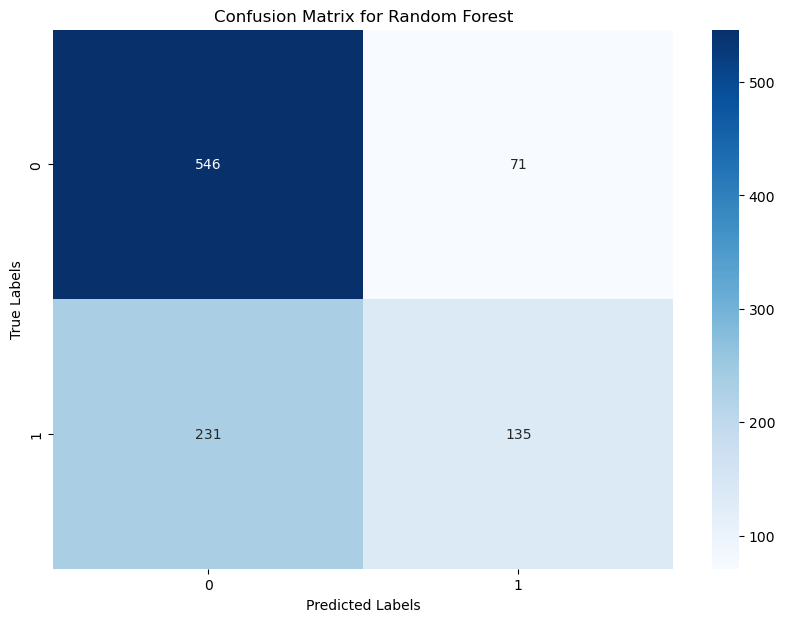

In [50]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
rf_conf_mat = confusion_matrix(y_test, rf_predictions)

# Plotting using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(rf_conf_mat, annot=True, fmt='g', cmap='Blues')  # 'g' is a general format, not limiting to integers
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TP: 135 samples of water were correctly predicted to be potable.
TN: 546 samples were correctly predicted to be unpotable.
FP: 71 samples were predicted to be portable, but were not.
FN: 231 samples were predicted to be unpotable  but they were potable.


Despite accuracy being decent,both the precision and recall are relatively low. 
This suggests that while your model makes a fair number of correct predictions, 
it struggles with distinguishing between the classes, leading to false positives and false negatives.

### Next steps
Feature engineering,
Try other mmodels